# Assignment 2 Exercise 2
# Group 3  

Importing relevant modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import TensorBoard

Using TensorFlow backend.


Reshaping and normalizing the data

In [2]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)

# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxH, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))

# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

# convert 1D class arrays to 10D class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)

Defining the model. The amount of neurons can be changed and additional layers can be added below.
For this exercise the middle dense layers can be removed to connect input directly to output. 
Removing the activation removes the non-linearity between layers.

In [3]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))   # flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Dense(64, activation=None)) # fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation=None)) # fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation=None)) # fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(10, activation='softmax'))  # output layer with 10 nodes (one for each class) and softmax nonlinearity
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # compile the model
model_name="Three layer 64 neurons no activation"
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


Logging the training process and training our model

In [4]:
# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/" + model_name)

# train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])
score = model.evaluate(X_test, y_test, verbose=0)
model.save('num_reader.model')

print("Loss: ",score[0])
print("Accuracy: ",score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 116us/step - loss: 0.5111 - acc: 0.8549 - val_loss: 0.3675 - val_acc: 0.8947
Epoch 2/10
54000/54000 [==============================] - 6s 111us/step - loss: 0.3259 - acc: 0.9070 - val_loss: 0.3319 - val_acc: 0.9085
Epoch 3/10
54000/54000 [==============================] - 6s 108us/step - loss: 0.3043 - acc: 0.9132 - val_loss: 0.3172 - val_acc: 0.9123
Epoch 4/10
54000/54000 [==============================] - 6s 104us/step - loss: 0.2939 - acc: 0.9177 - val_loss: 0.3121 - val_acc: 0.9125
Epoch 5/10
54000/54000 [==============================] - 6s 104us/step - loss: 0.2858 - acc: 0.9193 - val_loss: 0.3112 - val_acc: 0.9095
Epoch 6/10
54000/54000 [==============================] - 6s 106us/step - loss: 0.2812 - acc: 0.9211 - val_loss: 0.3094 - val_acc: 0.9117
Epoch 7/10
54000/54000 [==============================] - 5s 97us/step - loss: 0.2774 - acc: 0.9221 - val_loss: 0.3003 - va

# Checking predictions

The model expects an image with number 0

In [5]:
new = tf.keras.models.load_model('num_reader.model')
predictions = new.predict([X_test])
np.argmax(predictions[55]) #return index of max value 

0

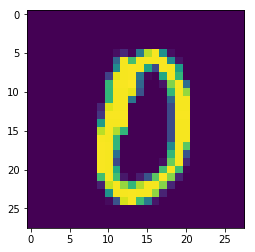

In [6]:
test = np.resize(X_test[55],(28,28))
plt.imshow(test)
plt.show()
